The goal of this worksheet is to justify Example 5.9 in <a href="https://arxiv.org/abs/1910.06490"><kbd>arxiv:1910.06490</kbd></a>., to apperar in *St. Petersbourg Math. J*. We are going to give a plane curve of type $(4,6;6,6)$. The example has equation in a number field $K$ with primitive element $\alpha$ with minimal polynomial $t^4 - 2 t^3 - 2 t^2 + 18 t + 21$. This extension contains the field of cubic roots of unity; the number $\zeta:=\frac{1}{6} \alpha^{3} - \frac{2}{3} \alpha^{2} + \frac{1}{2} \alpha + 2$ is a primitive cubic root of unity.

In [1]:
S.<t>=QQ[]
pol=t^4 - 2*t^3 - 2*t^2 + 18*t + 21
K.<alpha>=NumberField(pol)
zeta=1/6*alpha^3 - 2/3*alpha^2 + 1/2*alpha + 2
zeta.minpoly()

x^2 + x + 1

For the construction, we need a nodal cubic $C_3$. We provide a parametrization.

In [2]:
R.<x,y,z>=K[]
f=x*y*z+x^3-y^3
sb={x:t,y:t^2,z:t^3-1}
f.subs(sb)

0

We skip the long construction of a curve $C_4$ with has a singular point $P_0$ of type $\mathbb{A}_3$ and such that it intersects $C_3$ at two common smooth points with intersecion number 6.

In [3]:
g=(9219/250*alpha^3 - 18186/125*alpha^2 + 26649/250*alpha + 55566/125)*x^4 + (3262/125*alpha^3 - 13048/125*alpha^2 + 41034/125*alpha + 27468/125)*x^3*y - 80746/125*x^2*y^2 + (-1694/25*alpha^3 + 18256/125*alpha^2 + 5838/125*alpha - 117264/125)*x*y^3 + (-9051/250*alpha^3 + 18102/125*alpha^2 - 28161/250*alpha - 16191/25)*y^4 + (-188/5*alpha^3 + 564/5*alpha^2 - 564/5*alpha - 66276/125)*x^3*z + (-4428/125*alpha^3 + 17364/125*alpha^2 - 12588/125*alpha - 53484/125)*x^2*y*z + (-4312/125*alpha^3 + 17248/125*alpha^2 - 13632/125*alpha - 15384/25)*x*y^2*z + (-188/5*alpha^3 + 564/5*alpha^2 - 564/5*alpha - 55924/125)*y^3*z + (41/5*alpha^3 - 164/5*alpha^2 + 99/5*alpha + 762/5)*x^2*z^2 - 4676/125*x*y*z^2 + (-37/5*alpha^3 + 32*alpha^2 - 27*alpha - 432/5)*y^2*z^2 + (-8/5*alpha^3 + 4*alpha^2 - 108/5)*x*z^3 + (-4/5*alpha^3 + 16/5*alpha^2 - 36/5*alpha - 48/5)*y*z^3 + z^4

In [4]:
g

(9219/250*alpha^3 - 18186/125*alpha^2 + 26649/250*alpha + 55566/125)*x^4 + (3262/125*alpha^3 - 13048/125*alpha^2 + 41034/125*alpha + 27468/125)*x^3*y - 80746/125*x^2*y^2 + (-1694/25*alpha^3 + 18256/125*alpha^2 + 5838/125*alpha - 117264/125)*x*y^3 + (-9051/250*alpha^3 + 18102/125*alpha^2 - 28161/250*alpha - 16191/25)*y^4 + (-188/5*alpha^3 + 564/5*alpha^2 - 564/5*alpha - 66276/125)*x^3*z + (-4428/125*alpha^3 + 17364/125*alpha^2 - 12588/125*alpha - 53484/125)*x^2*y*z + (-4312/125*alpha^3 + 17248/125*alpha^2 - 13632/125*alpha - 15384/25)*x*y^2*z + (-188/5*alpha^3 + 564/5*alpha^2 - 564/5*alpha - 55924/125)*y^3*z + (41/5*alpha^3 - 164/5*alpha^2 + 99/5*alpha + 762/5)*x^2*z^2 - 4676/125*x*y*z^2 + (-37/5*alpha^3 + 32*alpha^2 - 27*alpha - 432/5)*y^2*z^2 + (-8/5*alpha^3 + 4*alpha^2 - 108/5)*x*z^3 + (-4/5*alpha^3 + 16/5*alpha^2 - 36/5*alpha - 48/5)*y*z^3 + z^4

We check the property of intersection number.

In [5]:
g.subs(sb).factor()

(t^2 + (-2/15*alpha^3 + 8/15*alpha^2 - 6/5*alpha - 8/5)*t - 1/6*alpha^3 + 2/3*alpha^2 - 1/2*alpha - 2)^6

Let us compute the singular points

In [6]:
jacobianideal=g.jacobian_ideal().minimal_associated_primes()
jacobianideal

[Ideal (z, 42*x + (9*alpha^3 - 28*alpha^2 + 11*alpha + 116)*y) of Multivariate Polynomial Ring in x, y, z over Number Field in alpha with defining polynomial t^4 - 2*t^3 - 2*t^2 + 18*t + 21]

In [7]:
a1=K(x.reduce(jacobianideal[0])(y=1))

The singular point $P_0$ is $\left[-\frac{3}{14} \alpha^{3} + \frac{2}{3} \alpha^{2} - \frac{11}{42} \alpha - \frac{58}{21}: 1: 0\right]$. To check its type we define a $2$-variable ring (an affine chart for which the singular point is the origin). We look for the tangent cone of this point of multiplicity 2.

In [8]:
T.<u,v>=K[]
p0=g(y=1,z=u,x=v+a1)
tangentcone=sum(p0.monomial_coefficient(m)*m for m in [v^2,u*v,u^2]).factor()[0]
tangentcone

(u + (-13/18*alpha^3 + 20/9*alpha^2 - 5/6*alpha - 28/3)*v, 2)

We perform a change of coordinates to get a more accurate Newton polygon

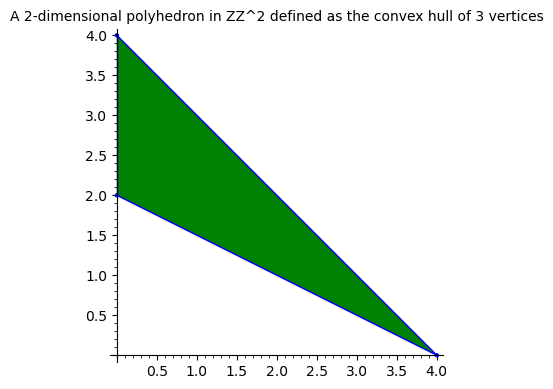

In [9]:
a2=-tangentcone[0].monomial_coefficient(v)^-1
p0=g(y=1,z=u,x=v+a1+a2*u)
p0.newton_polytope()

Together with the below computation, we get the confirmation that $P_0$ is of type $\mathbb{A}_3$.

In [10]:
newtonprincipal=sum(p0.monomial_coefficient(m)*m for m in [v^2,u^2*v,u^4])
newtonprincipal.discriminant(v)

12288/78125*u^4

The following computation ensures that $x-a_1 y-a_2 z=0$ is the tangent line of $C_4$ at the singular point $P_0$.

In [11]:
g(x=a1*y+a2*z)

-16/3125*z^4

We perform a projective change of coordinates for which $P_0=[0:1:0]$ and the tangent line of $C_4$ at $P_0$ is $z=0$.

In [12]:
change={x:z+a1*y+a2*x,z:x}

In [13]:
c4=g.subs(change)

In [14]:
c4.jacobian_ideal().minimal_associated_primes()

[Ideal (z, x) of Multivariate Polynomial Ring in x, y, z over Number Field in alpha with defining polynomial t^4 - 2*t^3 - 2*t^2 + 18*t + 21]

In [15]:
c4(z=0)

-16/3125*x^4

In [16]:
c3=f.subs(change)

Let us consider the rational $2:1$ map $\sigma:\mathbb{P}^2\dashrightarrow\mathbb{P}^2$, $\sigma([x:y:z]):=[x z:y^2:z^2]$. The strict preimages of $C_3$ and $C_4$ are $C_6$ and $D_4$, respectively.

In [17]:
d4=R(c4(x=x*z,y=y^2,z=z^2)/z^4)
c6=R(c3(x=x*z,y=y^2,z=z^2))

In [18]:
c6.jacobian_ideal().minimal_associated_primes()

[Ideal (z, y) of Multivariate Polynomial Ring in x, y, z over Number Field in alpha with defining polynomial t^4 - 2*t^3 - 2*t^2 + 18*t + 21,
 Ideal (y, 18*x + (13*alpha^3 - 40*alpha^2 + 15*alpha + 168)*z) of Multivariate Polynomial Ring in x, y, z over Number Field in alpha with defining polynomial t^4 - 2*t^3 - 2*t^2 + 18*t + 21]

In [19]:
d4.jacobian_ideal().minimal_associated_primes()

[Ideal (z, y, x) of Multivariate Polynomial Ring in x, y, z over Number Field in alpha with defining polynomial t^4 - 2*t^3 - 2*t^2 + 18*t + 21]

The curve $C_6$ is not smooth, but it intersects the smooth curve $D_4$ at four points with intersection number 6.

In [20]:
c6.resultant(d4).factor()

((-53263902703616/224482040752766143798828125*alpha^3 + 53263902703616/74827346917588714599609375*alpha^2 - 53263902703616/74827346917588714599609375*alpha - 2111493986320384/224482040752766143798828125)) * (y^4 + (85/24*alpha^3 - 85/6*alpha^2 + 35/8*alpha + 70)*y^2*z^2 + (775/48*alpha^3 - 5375/96*alpha^2 + 125/4*alpha + 6475/32)*z^4)^6

It is not hard to check that no conic is tangent to the curves at the four points. 